### **Importing the needed libraries:**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import fetch_openml
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report,confusion_matrix
import time
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

### **Reading the dataset into a dataframe:**

In [4]:
Occupancy=pd.read_csv("/content/Occupancy_Estimation.csv")

In [5]:
Occupancy.head(5)

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


# **Dataset Preprocessing:**

In [6]:
Occupancy.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [7]:
# are there any duplicates?
Occupancy.duplicated().sum()

0

In [8]:
Occupancy.dtypes

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

In [9]:
Occupancy = Occupancy.drop('Date', axis=1)
Occupancy = Occupancy.drop('Time', axis=1)

In [10]:
#counting the values for the target variable
Occupancy['Room_Occupancy_Count'].value_counts()

0    8228
2     748
3     694
1     459
Name: Room_Occupancy_Count, dtype: int64

# **Exploratory Data Analysis**

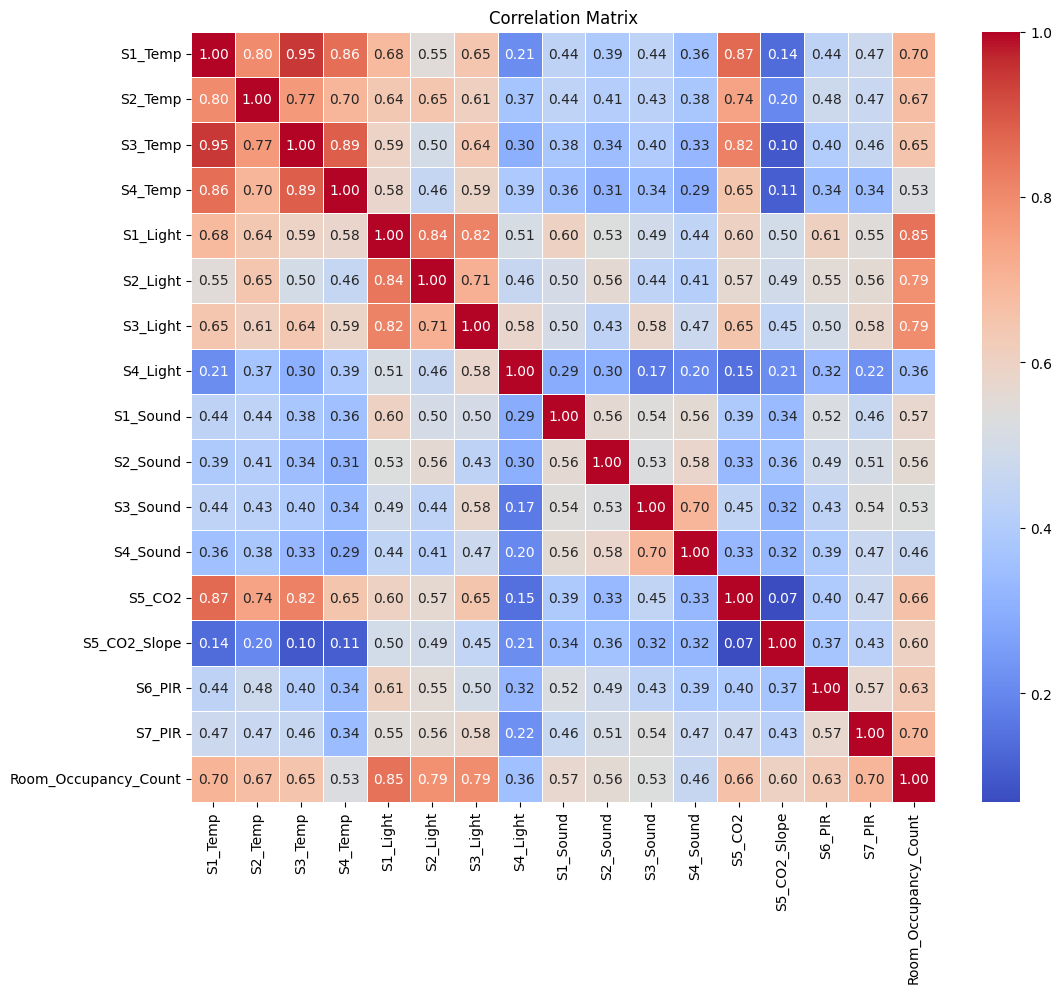

In [33]:
corr_matrix = Occupancy.corr() # Calculating the correlation matrix for the 'Occupancy' DataFrame

# here I will show the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### **Relationship between room Occupancy and CO2 levels:**

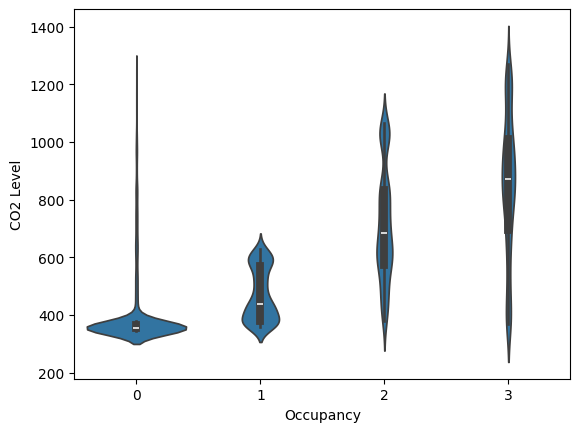

In [34]:
sns.violinplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S5_CO2'],)
plt.xlabel('Occupancy')
plt.ylabel('CO2 Level')
plt.show()

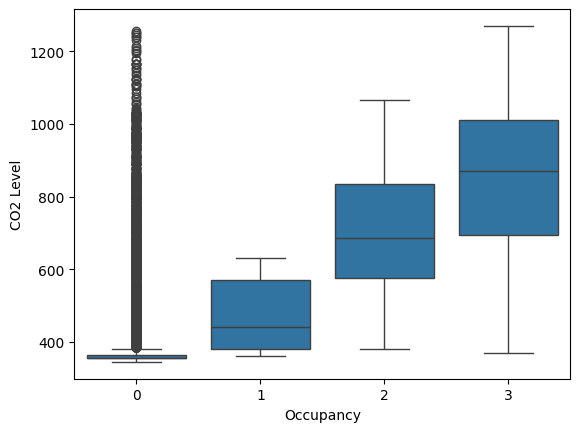

In [35]:
sns.boxplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S5_CO2'],)
plt.xlabel('Occupancy')
plt.ylabel('CO2 Level')
plt.show()

**These two plots suggests that when the number of people in the room increases, the level of CO2 in the room will also increase. And it decreases when the number of people decreases. Therefore, it is a good indecator for finding occupancy.**

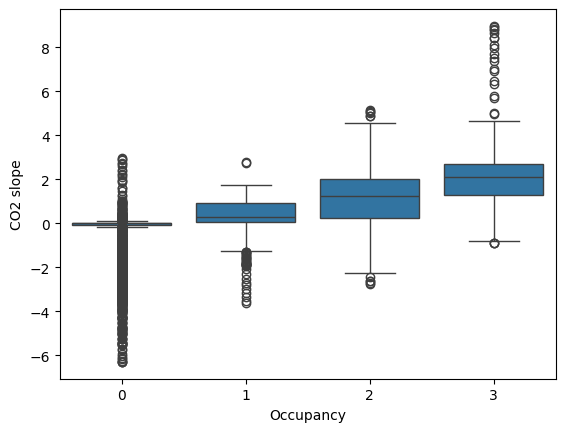

In [36]:
sns.boxplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S5_CO2_Slope'],)
plt.xlabel('Occupancy')
plt.ylabel('CO2 slope')
plt.show()

**This box plot represents how the slope changes,it is important as it indicates people entering or leaving the room based on co2 changes, it helps in better predicting for Occupancy, as the co2 level could change for multiple reasons, such as a door or a window opening which would could reduce Co2 level, However it dosen't mean that people has left the room.**

### **Relationship between room Occupancy and Temperature, Light, and sound:**

---



**Room Occupancy and Temperature**

<ipython-input-37-a1dde0beab64>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S1_Temp'], palette='viridis')
<ipython-input-37-a1dde0beab64>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S2_Temp'], palette='viridis')
<ipython-input-37-a1dde0beab64>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S3_Temp'], palette='viridis')
<ipython-input-37-a1dde0beab64>:17: FutureWar

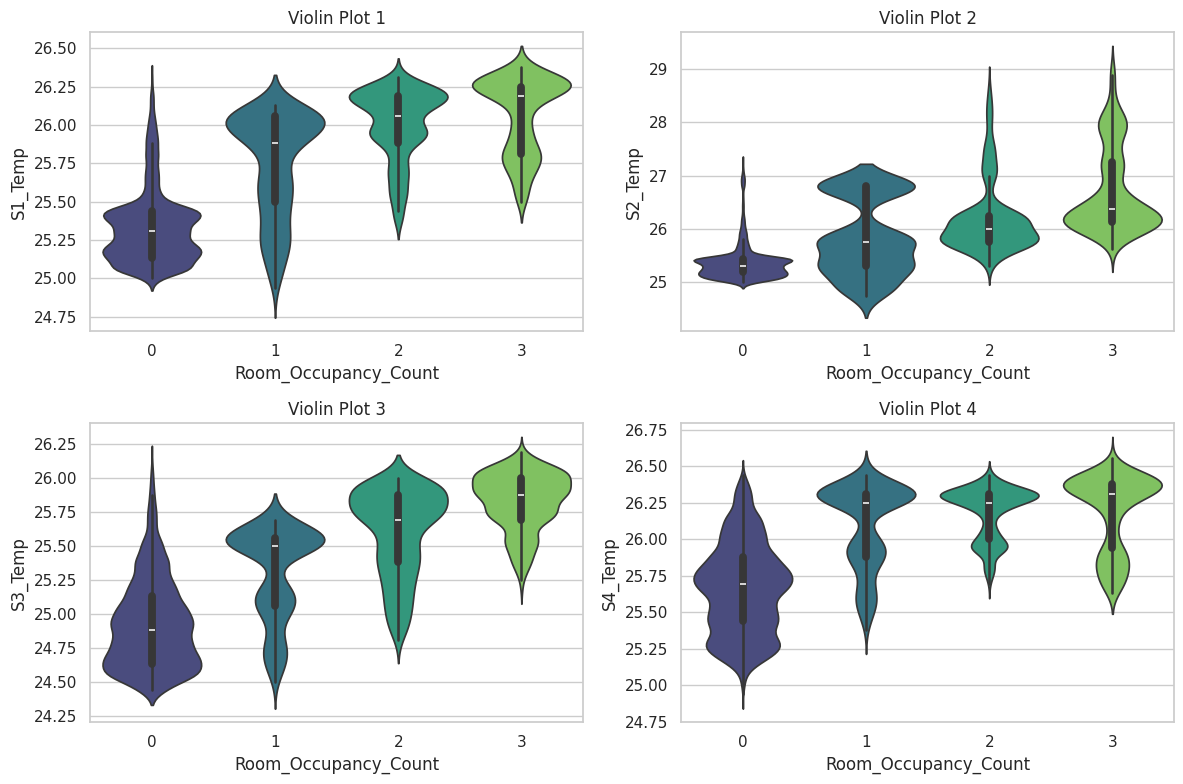

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.violinplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S1_Temp'], palette='viridis')
plt.title('Violin Plot 1')

plt.subplot(2, 2, 2)
sns.violinplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S2_Temp'], palette='viridis')
plt.title('Violin Plot 2')

plt.subplot(2, 2, 3)
sns.violinplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S3_Temp'], palette='viridis')
plt.title('Violin Plot 3')

plt.subplot(2, 2, 4)
sns.violinplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S4_Temp'], palette='viridis')
plt.title('Violin Plot 4')

plt.tight_layout()
plt.show()# p-value + median

**These four violin plots show the temperature in different parts of the room. it clearly shows that the temperature changes between different parts of the room. the first, third, and fourth plots clearly delivers that as the number of people increases the temperature of the room increases, and this makes sense because human body generates heat so the more people their are the higher the temperature will get. however, the plots are not all the same and this is logical as it depends on the location of the sensor and the position of the people in the room.**

**Room Occupancy and Light**

---



<ipython-input-38-8a2d3a0db3ea>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S1_Light'], palette='viridis')
<ipython-input-38-8a2d3a0db3ea>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S2_Light'], palette='viridis')
<ipython-input-38-8a2d3a0db3ea>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S3_Light'], palette='viridis')
<ipython-input-38-8a2d3a0db3ea>:17: Future

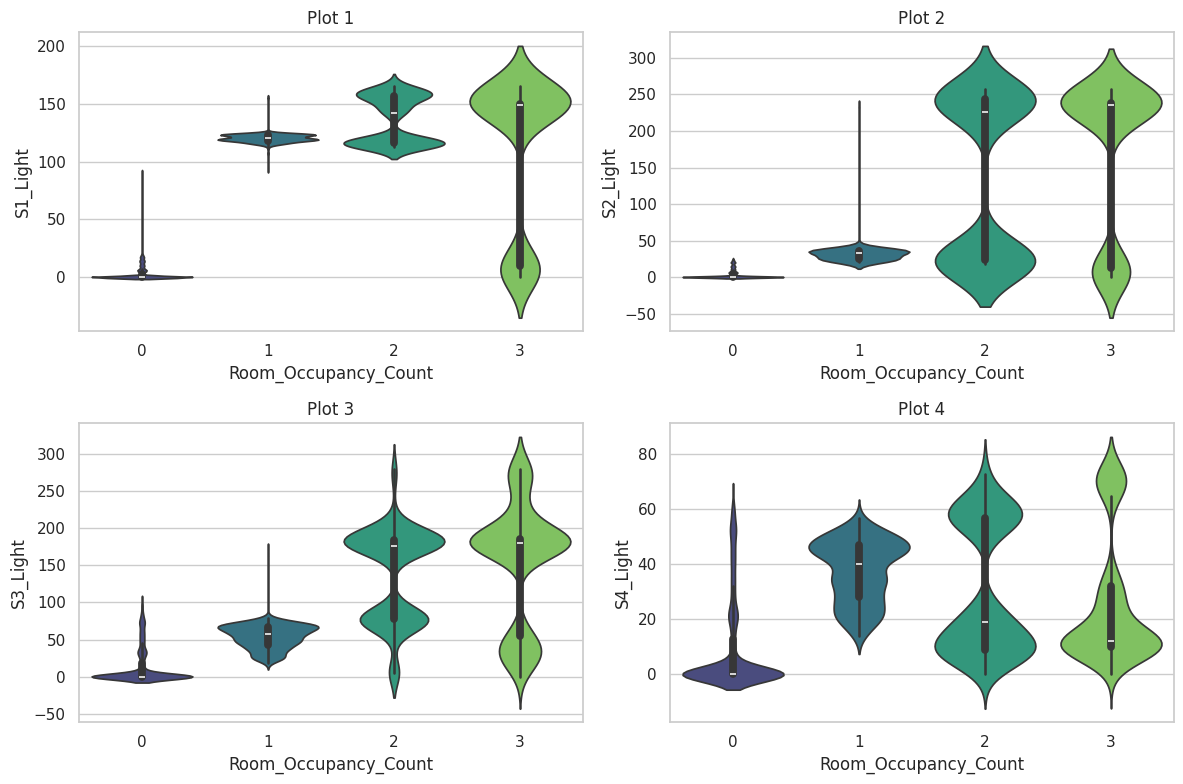

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.violinplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S1_Light'], palette='viridis')
plt.title('Plot 1')

plt.subplot(2, 2, 2)
sns.violinplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S2_Light'], palette='viridis')
plt.title('Plot 2')

plt.subplot(2, 2, 3)
sns.violinplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S3_Light'], palette='viridis')
plt.title('Plot 3')

plt.subplot(2, 2, 4)
sns.violinplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S4_Light'], palette='viridis')
plt.title('Plot 4')

plt.tight_layout()
plt.show()

**These four violin plots show the amount of light at different sensors in the room. it shows that as the number  of people increases, the amount of light also increases. however, it is not the same amount across all the sensors.**





**Room Occupancy and sound**

---



<ipython-input-39-9aca3f58039b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S1_Sound'], palette='viridis')
<ipython-input-39-9aca3f58039b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S2_Sound'], palette='viridis')
<ipython-input-39-9aca3f58039b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S3_Sound'], palette='viridis')
<ipython-input-39-9aca3f58039b>:17: Future

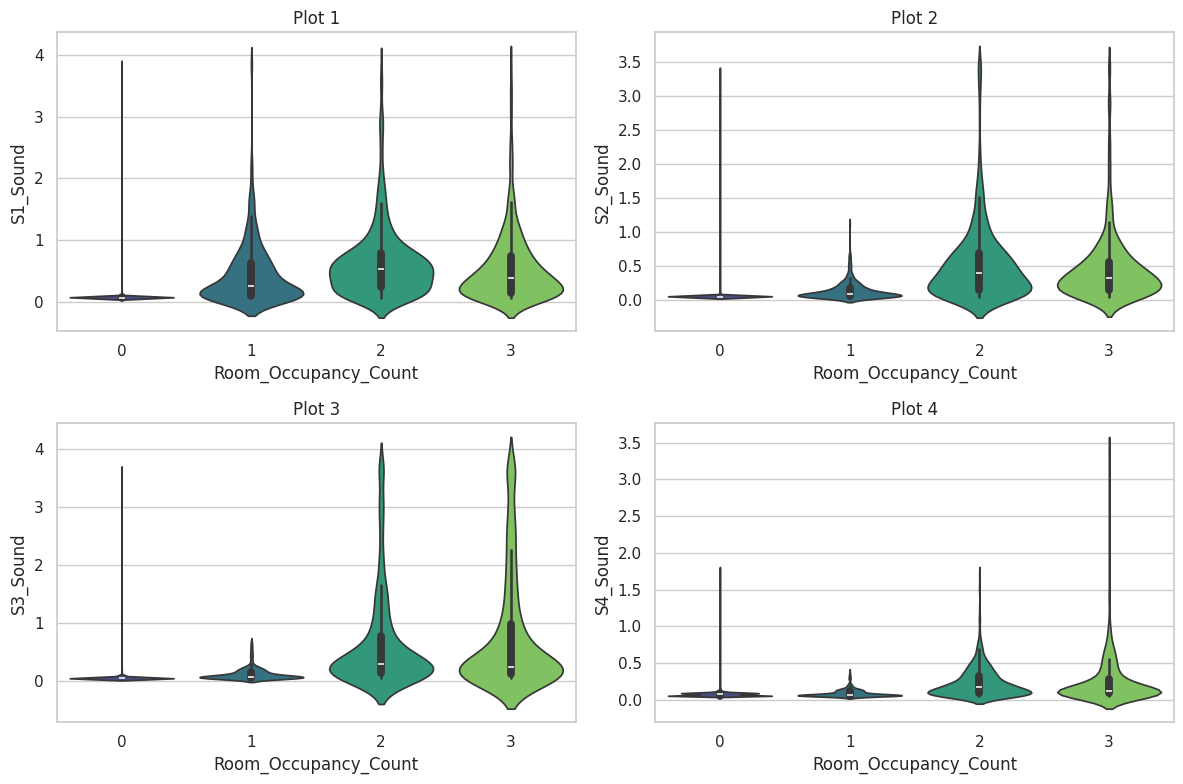

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.violinplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S1_Sound'], palette='viridis')
plt.title('Plot 1')

plt.subplot(2, 2, 2)
sns.violinplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S2_Sound'], palette='viridis')
plt.title('Plot 2')

plt.subplot(2, 2, 3)
sns.violinplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S3_Sound'], palette='viridis')
plt.title('Plot 3')

plt.subplot(2, 2, 4)
sns.violinplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S4_Sound'], palette='viridis')
plt.title('Plot 4')

plt.tight_layout()
plt.show()

<ipython-input-40-e8fb6c626139>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S1_Sound'], palette='viridis')
<ipython-input-40-e8fb6c626139>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S2_Sound'], palette='viridis')
<ipython-input-40-e8fb6c626139>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S3_Sound'], palette='viridis')
<ipython-input-40-e8fb6c626139>:17: FutureWarning: 

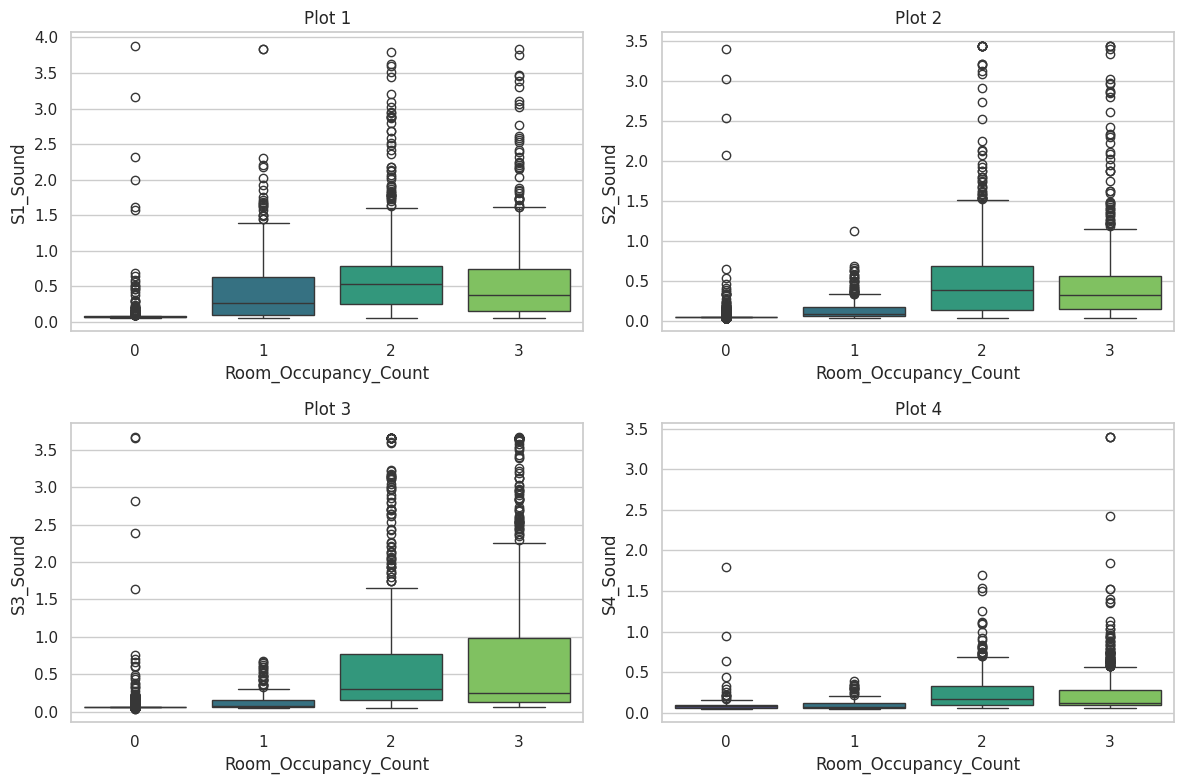

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S1_Sound'], palette='viridis')
plt.title('Plot 1')

plt.subplot(2, 2, 2)
sns.boxplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S2_Sound'], palette='viridis')
plt.title('Plot 2')

plt.subplot(2, 2, 3)
sns.boxplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S3_Sound'], palette='viridis')
plt.title('Plot 3')

plt.subplot(2, 2, 4)
sns.boxplot(x = Occupancy['Room_Occupancy_Count'],y = Occupancy['S4_Sound'], palette='viridis')
plt.title('Plot 4')

plt.tight_layout()
plt.show()

**These plots indecates that as the number of people increases, the amount of sound would increase. another thing that these plots indecates is that the amount of sound never reaches zero, that could be duo to the heating, ventilation and air conditioning systems. as the number of people increases there will be more talk and the conditioning systems will produce higher sounds.**

### **S6_PIR and S7_PIR count**

In [41]:
Occupancy['S6_PIR'].value_counts()

0    9216
1     913
Name: S6_PIR, dtype: int64

In [42]:
Occupancy['S7_PIR'].value_counts()

0    9323
1     806
Name: S7_PIR, dtype: int64

### **Visualizing the frequency of the target variable**

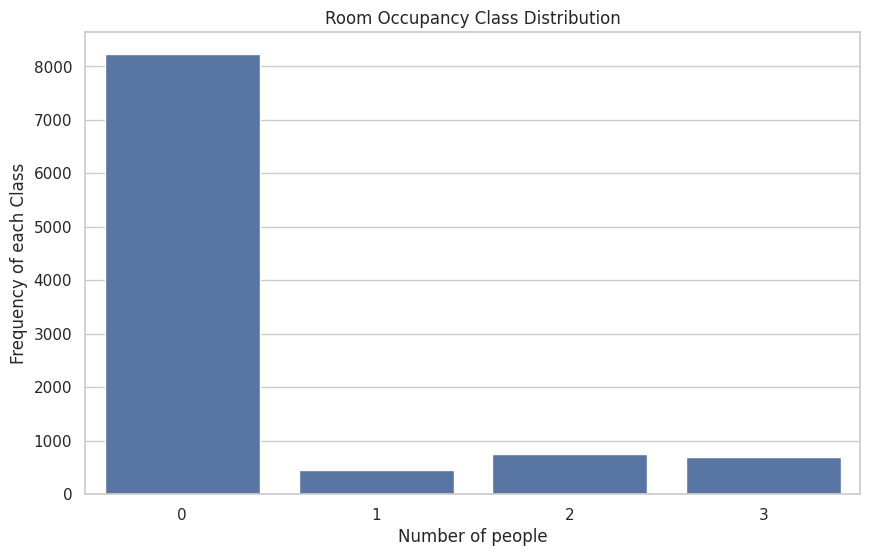

In [43]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")# adding grids
sns.countplot(x=Occupancy['Room_Occupancy_Count'])

plt.title('Room Occupancy Class Distribution')
plt.xlabel('Number of people')
plt.ylabel('Frequency of each Class')

plt.show()

**This bar plot indecates that class 0 which means there are no people in the room is the most common class. and the classes 1, 2, and 3 are a lot less than the 0 class but they are close to each other.**

**This might cause a problem while training the models, however it could be normal. but I will try to train the models before and after balancing the data too see what results are better.**

## **Splitting the dataset into training and testing**

In [44]:
X = Occupancy.iloc[:, :-1]
y = Occupancy.iloc[:, -1]

# spliting the Occupancy dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Training Models: Random forest, SVM , gradient boosting, and XGBoost**

## **Random Forest**

**Basic Random Forest Classification**

---



*  **Creating Random Forest Model**




In [60]:
ForestModel = RandomForestClassifier()

In [61]:
ForestModel.fit(X_train,y_train)

RandomForestClassifier()

In [62]:
y_pred = ForestModel.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[1619    0    0    0]
 [   0  103    0    0]
 [   0    1  162    1]
 [   1    0    1  138]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.99      0.99      0.99       164
           3       0.99      0.99      0.99       140

    accuracy                           1.00      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026



In [63]:
print("train accuracy:",ForestModel.score(X_train,y_train))
print("test accuracy:",ForestModel.score(X_test,y_test))

train accuracy: 1.0
test accuracy: 0.998025666337611


**Hyperparameter-Tuned Random Forest with Cross-Validation**

---



*  **Creating Random Forest Model:**




In [64]:
ForestModel = RandomForestClassifier()

*  **Defining the Hyperparameter for Grid search:**




In [65]:
param_grid = {
    'n_estimators': [50, 100, 200], #number of trees
    'max_depth': [10, 20],  #maximum depth of trees
}

In [66]:
# Cross-Validation (with Grid Search)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # 5 folds, and "stratified" to make each fold take parts from each class

In [67]:
Start_time = time.time()
# Grid search with nested cross-validation // using all the available CPU cores for parallelization --> (n_jobs=-1)
grid_search = GridSearchCV(ForestModel, param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train) # Performing the grid search with cross-validation
End_time = time.time()

In [68]:
#Printing  the hyperparameters that resulted in the highest cross-validated accuracy.
print(f"Best Parameters: {grid_search.best_params_}")

#Printing the corresponding cross-validated accuracy achieved with the best hyperparameters.
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9973


In [69]:
# Evaluate on the test set
#.best_estimator_: Retrieves the model with the best hyperparameters.
best_RF_model = grid_search.best_estimator_

# Calculate and print the accuracy on the test set using the best model
print("train accuracy:", best_RF_model.score(X_train, y_train))
print("test accuracy:", best_RF_model.score(X_test, y_test))

train accuracy: 0.9998765889176848
test accuracy: 0.9990128331688055


In [70]:
# the time that this model took:
print(f"Time taken for Random Forest was: {End_time - Start_time:.2f} seconds")

Time taken for Random Forest was: 27.41 seconds


In [71]:
y_pred = best_RF_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[1619    0    0    0]
 [   0  103    0    0]
 [   0    1  163    0]
 [   0    0    1  139]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.99      0.99      0.99       164
           3       1.00      0.99      1.00       140

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



## **Support vector machine (SVM)**

In [72]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(X_train,y_train)
print("train accuracy:",svm.score(X_train,y_train))
print("test accuracy:",svm.score(X_test,y_test))

train accuracy: 0.9734666173022337
test accuracy: 0.9733464955577492


In [73]:
from sklearn.svm import SVC
import numpy as np
svm_model = SVC(kernel='linear', C=0.01)
start_time = time.time()
svm_model.fit(X_train, y_train)
end_time = time.time()

# here I Calculated the accuracy on the test set
print("train accuracy:",svm_model.score(X_train,y_train))
print("test accuracy:",svm_model.score(X_test,y_test))

SVMtime = end_time - start_time
print("time taken for SVM without grid is {:.2f} seconds".format(SVMtime))

train accuracy: 0.9893866469208935
test accuracy: 0.9861796643632774
time taken for SVM without grid is 0.49 seconds


In [74]:
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['poly'],
              'degree': [2, 3, 4],
              'coef0': [0.0, 1.0, 2.0]}

# Create an SVM model
svm_model = SVC()

start_time = time.time()
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and their corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}".format(grid_search.best_score_))

best_svm_model = grid_search.best_estimator_

# Calculate and print the accuracy on the test set using the best model
print("train accuracy:", best_svm_model.score(X_train, y_train))
print("test accuracy:", best_svm_model.score(X_test, y_test))

# Calculate and print the time taken for the model
SVMtime = end_time - start_time
print("Time taken for SVM with grid search for Poly only: {:.2f} seconds".format(SVMtime))

Best Parameters:  {'C': 100, 'coef0': 2.0, 'degree': 4, 'kernel': 'poly'}
Best Cross-Validation Accuracy: 1.00
train accuracy: 0.9964210786128594
test accuracy: 0.9950641658440277
Time taken for SVM with grid search for Poly only: 62.63 seconds


In [75]:
y_pred = best_svm_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[1619    0    0    0]
 [   0  103    0    0]
 [   0    1  159    4]
 [   2    0    3  135]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.98      0.97      0.98       164
           3       0.97      0.96      0.97       140

    accuracy                           1.00      2026
   macro avg       0.99      0.98      0.98      2026
weighted avg       1.00      1.00      1.00      2026



In [76]:
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['poly', 'sigmoid', 'rbf'],
              }

# Create an SVM model
svm_model = SVC()

start_time = time.time()
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and their corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

# here I Calculated the accuracy on the test set
print("train accuracy:", best_svm_model.score(X_train, y_train))
print("test accuracy:", best_svm_model.score(X_test, y_test))

# Calculating and printing the time taken for the model
SVMtime = end_time - start_time
print("time taken for SVM with grid search: {:.2f} seconds".format(SVMtime))

Best Parameters:  {'C': 100, 'kernel': 'poly'}
Best Cross-Validation Accuracy: 0.99
train accuracy: 0.9902505244970998
test accuracy: 0.9866732477788747
time taken for SVM with grid search: 40.89 seconds


In [77]:
y_pred = best_svm_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[1619    0    0    0]
 [   0  103    0    0]
 [   0    1  157    6]
 [  17    0    3  120]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1619
           1       0.99      1.00      1.00       103
           2       0.98      0.96      0.97       164
           3       0.95      0.86      0.90       140

    accuracy                           0.99      2026
   macro avg       0.98      0.95      0.97      2026
weighted avg       0.99      0.99      0.99      2026



In [78]:
param_grid = {
              'C': [100],
              'kernel': ['linear','poly'],
              }

# Create an SVM model
svm_model = SVC()

start_time = time.time()
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and their corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

# here I Calculated the accuracy on the test set
print("train accuracy:", best_svm_model.score(X_train, y_train))
print("test accuracy:", best_svm_model.score(X_test, y_test))

# Calculating and printing the time taken for the model
SVMtime = end_time - start_time
print("time taken for SVM with grid search: {:.2f} seconds".format(SVMtime))

Best Parameters:  {'C': 100, 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.99
train accuracy: 0.9961742564482291
test accuracy: 0.9925962487660415
time taken for SVM with grid search: 46.56 seconds


In [79]:
y_pred = best_svm_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[1619    0    0    0]
 [   1  102    0    0]
 [   0    3  157    4]
 [   1    0    6  133]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.97      0.99      0.98       103
           2       0.96      0.96      0.96       164
           3       0.97      0.95      0.96       140

    accuracy                           0.99      2026
   macro avg       0.98      0.97      0.98      2026
weighted avg       0.99      0.99      0.99      2026



## **Gradient Boosting**

In [80]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average="micro")
    recall = recall_score(y_test, y_pred,average="micro")
    f1 = f1_score(y_test, y_pred,average="micro")
    return accuracy, precision, recall, f1



---



In [81]:
# Gradient Boosting
grad_model = GradientBoostingClassifier(n_estimators=3, learning_rate=0.01, random_state=42)
Start_time = time.time()
grad_model.fit(X_train, y_train)
End_time = time.time()
# Evaluate Gradient Boosting
grad_metrics = evaluate_model(grad_model, X_test, y_test)

print("Gradient Boosting Metrics: Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(*grad_metrics))
print(f"Time taken for Gradient Boosting was: {End_time - Start_time:.2f} seconds")

Gradient Boosting Metrics: Accuracy: 0.80, Precision: 0.80, Recall: 0.80, F1 Score: 0.80
Time taken for Gradient Boosting was: 0.17 seconds




---



In [82]:
# Gradient Boosting
grad_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.01, random_state=42)
Start_time = time.time()
grad_model.fit(X_train, y_train)
End_time = time.time()
# Evaluate Gradient Boosting
grad_metrics = evaluate_model(grad_model, X_test, y_test)

print("Gradient Boosting Metrics: Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(*grad_metrics))
print(f"Time taken for Gradient Boosting was: {End_time - Start_time:.2f} seconds")

Gradient Boosting Metrics: Accuracy: 0.92, Precision: 0.92, Recall: 0.92, F1 Score: 0.92
Time taken for Gradient Boosting was: 3.13 seconds




---



In [83]:
# Gradient Boosting
grad_model = GradientBoostingClassifier(n_estimators=80, learning_rate=0.01, random_state=42)
Start_time = time.time()
grad_model.fit(X_train, y_train)
End_time = time.time()
# Evaluate Gradient Boosting
grad_metrics = evaluate_model(grad_model, X_test, y_test)

print("Gradient Boosting Metrics: Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(*grad_metrics))
print(f"Time taken for Gradient Boosting was: {End_time - Start_time:.2f} seconds")

Gradient Boosting Metrics: Accuracy: 0.98, Precision: 0.98, Recall: 0.98, F1 Score: 0.98
Time taken for Gradient Boosting was: 5.34 seconds




---



In [84]:
GridParam_Gradient = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model_grad = GradientBoostingClassifier(random_state=42)

start_time = time.time()

grid_search_grad = GridSearchCV(model_grad, GridParam_Gradient, cv=kfold, scoring='accuracy', n_jobs=-1)
grid_search_grad.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Grid Search took {elapsed_time:.2f} seconds")
print(f"Best Parameters: {grid_search_grad.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_grad.best_score_:.4f}")

best_Gradient_model = grid_search_grad.best_estimator_
print("train accuracy:", best_Gradient_model.score(X_train, y_train))
print("test accuracy:", best_Gradient_model.score(X_test, y_test))

Grid Search took 211.06 seconds
Best Parameters: {'learning_rate': 0.2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.9969
train accuracy: 1.0
test accuracy: 0.9965449160908193


In [85]:
y_pred = best_Gradient_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[1618    0    0    1]
 [   0  103    0    0]
 [   0    1  162    1]
 [   2    0    2  136]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.99      0.99      0.99       164
           3       0.99      0.97      0.98       140

    accuracy                           1.00      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026





---



In [86]:
GridParam_Gradient = {
    'n_estimators': [10,20,30,50],
    'learning_rate': [0.001,0.01,0.3],
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model_grad = GradientBoostingClassifier()

start_time = time.time()

grid_search_grad = GridSearchCV(model_grad, GridParam_Gradient, cv=kfold, scoring='accuracy', n_jobs=-1)
grid_search_grad.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Grid Search took {elapsed_time:.2f} seconds")
print(f"Best Parameters: {grid_search_grad.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_grad.best_score_:.4f}")

best_Gradient_model = grid_search_grad.best_estimator_
print("train accuracy:", best_Gradient_model.score(X_train, y_train))
print("test accuracy:", best_Gradient_model.score(X_test, y_test))

Grid Search took 69.45 seconds
Best Parameters: {'learning_rate': 0.3, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.9969
train accuracy: 1.0
test accuracy: 0.9965449160908193


In [87]:
y_pred = best_Gradient_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[1619    0    0    0]
 [   0  102    1    0]
 [   0    1  161    2]
 [   2    0    1  137]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      0.99      0.99       103
           2       0.99      0.98      0.98       164
           3       0.99      0.98      0.98       140

    accuracy                           1.00      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026





---



## **XGBoost**

In [88]:
xgb_model = XGBClassifier(n_estimators=5, learning_rate=0.01, reg_lambda=1.0, reg_alpha=0.0,
                          use_label_encoder=False, eval_metric='logloss', random_state=42)
Start_time = time.time()
xgb_model.fit(X_train, y_train)
End_time = time.time()

xgb_metrics = evaluate_model(xgb_model, X_test, y_test)

print("XGBoost Metrics: Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(*xgb_metrics))
print(f"Time taken for XGBoost was: {End_time - Start_time:.2f} seconds")

XGBoost Metrics: Accuracy: 0.99, Precision: 0.99, Recall: 0.99, F1 Score: 0.99
Time taken for XGBoost was: 0.14 seconds




---



In [89]:
xgb_model = XGBClassifier(n_estimators= 100, learning_rate= 0.2, reg_lambda= 0.1, reg_alpha= 0.2,
                          use_label_encoder=False, eval_metric='logloss', random_state=42)
Start_time = time.time()
xgb_model.fit(X_train, y_train)
End_time = time.time()

xgb_metrics = evaluate_model(xgb_model, X_test, y_test)

print("XGBoost Metrics: Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(*xgb_metrics))
print(f"Time taken for XGBoost was: {End_time - Start_time:.2f} seconds")

XGBoost Metrics: Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1 Score: 1.00
Time taken for XGBoost was: 1.37 seconds




---



In [90]:
xgb_model = XGBClassifier(n_estimators= 50, learning_rate= 0.1, reg_lambda= 0.5, reg_alpha= 0.1,
                          use_label_encoder=False, eval_metric='logloss', random_state=42)
Start_time = time.time()
xgb_model.fit(X_train, y_train)
End_time = time.time()

xgb_metrics = evaluate_model(xgb_model, X_test, y_test)

print("XGBoost Metrics: Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(*xgb_metrics))
print(f"Time taken for XGBoost was: {End_time - Start_time:.2f} seconds")

XGBoost Metrics: Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1 Score: 1.00
Time taken for XGBoost was: 1.17 seconds




---



In [91]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}


model_xgb = XGBClassifier(random_state=42, eval_metric='logloss')


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


start_time = time.time()


grid_search_xgb = GridSearchCV(model_xgb, param_grid_xgb, cv=kfold, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)


end_time = time.time()

elapsed_time = end_time - start_time


print(f"\nGrid Search took {elapsed_time:.2f} seconds")
print(f"Best Parameters: {grid_search_xgb.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_xgb.best_score_:.4f}")


best_XGB_model = grid_search_xgb.best_estimator_
print("train accuracy:", best_XGB_model.score(X_train, y_train))
print("test accuracy:", best_XGB_model.score(X_test, y_test))


Grid Search took 21.67 seconds
Best Parameters: {'learning_rate': 0.2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9975
train accuracy: 1.0
test accuracy: 0.9970384995064165


In [92]:
y_pred = best_Gradient_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[1619    0    0    0]
 [   0  102    1    0]
 [   0    1  161    2]
 [   2    0    1  137]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      0.99      0.99       103
           2       0.99      0.98      0.98       164
           3       0.99      0.98      0.98       140

    accuracy                           1.00      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026





---



# **Refrences of the Code:**

In [ ]:
#Stack Overflow. (n.d.). python - Delete a column from a Pandas DataFrame. Available at:
#https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe.

In [ ]:
#GeeksforGeeks. (2023). Multiclass classification using CatBoost.
#Available at: https://www.geeksforgeeks.org/multiclass-classification-using-catboost/#exploratory-data-analysis

In [ ]:
#GeeksforGeeks. (2021). How to split a Dataset into Train and Test Sets using Python.
#Available at: https://www.geeksforgeeks.org/how-to-split-a-dataset-into-train-and-test-sets-using-python/.

In [ ]:
#kaggle.com. (n.d.). Room Occupancy Prediction.
#Available at: https://www.kaggle.com/code/sinhasatwik/room-occupancy-prediction

In [ ]:
#kaggle.com. (n.d.). Mobile Price Classification with SVM.
#Available at: https://www.kaggle.com/code/gulsahdemiryurek/mobile-price-classification-with-svm

In [ ]:
#scikit learn (2018). 1.4. Support Vector Machines — scikit-learn 0.20.3 documentation.
# Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/svm.html.

In [ ]:
#Jason Brownlee (2016). A Gentle Introduction to XGBoost for Applied Machine Learning.
 #Machine Learning Mastery. Available at: https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/.

In [ ]:
#GeeksforGeeks. (2020). ML - Gradient Boosting. [online] Available at: https://www.geeksforgeeks.org/ml-gradient-boosting/.

In [ ]:
#Scikit-learn (2018). sklearn.ensemble.RandomForestClassifier — scikit-learn 0.20.3 documentation.
#[online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.

In [ ]:
#scikit-learn (2019). sklearn.model_selection.GridSearchCV — scikit-learn 0.22 documentation.
#[online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

In [ ]:
#Okamura, S. (2020). GridSearchCV for Beginners. [online] Medium.
#Available at: https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee.

In [ ]:
#GeeksforGeeks. (2020). Stratified K Fold Cross Validation.
#[online] Available at: https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/.

In [ ]:
#Scikit-learn.org. (2019). sklearn.model_selection.StratifiedKFold — scikit-learn 0.21.3 documentation.
#[online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html.

In [ ]:
#SciKit-Learn (2009). 3.1. Cross-validation: evaluating estimator performance — scikit-learn 0.21.3 documentation.
#[online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/cross_validation.html.